In [ ]:
import numpy as np

In [ ]:
!wget http://www.manythings.org/anki/deu-eng.zip

--2020-07-06 01:31:21--  http://www.manythings.org/anki/deu-eng.zip
Resolving www.manythings.org (www.manythings.org)... 104.24.109.196, 104.24.108.196, 172.67.173.198, ...
Connecting to www.manythings.org (www.manythings.org)|104.24.109.196|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8171564 (7.8M) [application/zip]
Saving to: ‘deu-eng.zip’

deu-eng.zip         100%[===================>]   7.79M  1.88MB/s    in 4.8s    

2020-07-06 01:31:26 (1.61 MB/s) - ‘deu-eng.zip’ saved [8171564/8171564]



In [ ]:
!unzip deu-eng.zip

Archive:  deu-eng.zip
  inflating: deu.txt                 
  inflating: _about.txt              


In [ ]:
def read_text(filename):
  file = open(filename,mode="rt",encoding="utf-8")
  text = file.read()
  file.close()
  return text

def to_lines(text):
  pairs = text.strip().split('\n')
  sents = [p.split('\t') for p in pairs]
  return sents

data = read_text("deu.txt")
deu_eng = to_lines(data)
deu_eng = np.array(deu_eng)

deu_eng[0]


array(['Go.', 'Geh.',
       'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
      dtype='<U537')

In [ ]:
deu_eng = deu_eng[:50000,:]

In [ ]:
deu_eng

array([['Go.', 'Geh.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Hi.', 'Hallo!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['Hi.', 'Grüß Gott!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ...,
       ['They come from Sweden.', 'Sie kommen aus Schweden.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #622193 (CK) & #622244 (BraveSentry)'],
       ['They could hardly see.', 'Sie konnten kaum etwas sehen.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #306021 (CK) & #611800 (virgil)'],
       ["They didn't choose me.", 'Sie wählten mich nicht.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #5090802 (AlanF_US) & #5091265 (bonny37)']],
      dtype='<U537')

In [ ]:
import string

deu_eng[:,0] = [s.translate(str.maketrans("","",string.punctuation)) for s in deu_eng[:,0]]
deu_eng[:,1] = [s.translate(str.maketrans("","",string.punctuation)) for s in deu_eng[:,1]]

In [ ]:
deu_eng

array([['Go', 'Geh',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Hi', 'Hallo',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['Hi', 'Grüß Gott',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ...,
       ['They come from Sweden', 'Sie kommen aus Schweden',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #622193 (CK) & #622244 (BraveSentry)'],
       ['They could hardly see', 'Sie konnten kaum etwas sehen',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #306021 (CK) & #611800 (virgil)'],
       ['They didnt choose me', 'Sie wählten mich nicht',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #5090802 (AlanF_US) & #5091265 (bonny37)']],
      dtype='<U537')

In [ ]:
for i in range(len(deu_eng)):
  deu_eng[i,0] = deu_eng[i,0].lower()
  deu_eng[i,1] = deu_eng[i,1].lower()

In [ ]:
deu_eng[:,:2]

array([['go', 'geh'],
       ['hi', 'hallo'],
       ['hi', 'grüß gott'],
       ...,
       ['they come from sweden', 'sie kommen aus schweden'],
       ['they could hardly see', 'sie konnten kaum etwas sehen'],
       ['they didnt choose me', 'sie wählten mich nicht']], dtype='<U537')

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd

In [ ]:
eng_len = [len(s.split()) for s in deu_eng[:,0]]
deu_len = [len(s.split()) for s in deu_eng[:,1]]
#print(eng_len)

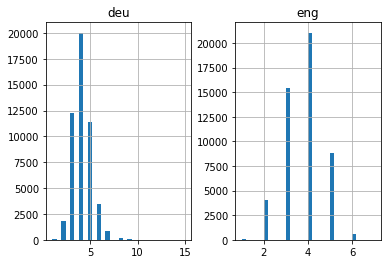

       eng  deu
0        1    1
1        1    1
2        1    2
3        1    1
4        1    1
...    ...  ...
49995    5    7
49996    4    5
49997    4    4
49998    4    5
49999    4    4

[50000 rows x 2 columns]


In [ ]:
length_df = pd.DataFrame({'eng':eng_len, 'deu':deu_len})
length_df.hist(bins=30)
plt.show()
print(length_df)

In [ ]:
print(max(eng_len))
print(max(deu_len))

7
15


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [ ]:
eng_tokenizer = Tokenizer()
eng_tokenizer.fit_on_texts(deu_eng[:,0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
print(eng_vocab_size)

6295


In [ ]:
deu_tokenizer = Tokenizer()
deu_tokenizer.fit_on_texts(deu_eng[:,1])
deu_vocab_size = len(deu_tokenizer.word_index) + 1
print(deu_vocab_size)

10401


In [ ]:
eng_max_length = 8
deu_max_length = 8

In [ ]:
def encode_sequences(tokenizer, length, lines):
  seq = tokenizer.texts_to_sequences(lines)
  seq = pad_sequences(seq, maxlen=length, padding='post')
  return seq

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(deu_eng, test_size=0.2, random_state=12)


In [ ]:
trainX = encode_sequences(deu_tokenizer,
                          deu_max_length,
                          train[:,1])

trainY = encode_sequences(eng_tokenizer,
                          eng_max_length,
                          train[:,0])

print(trainX.shape, trainY.shape)

(40000, 8) (40000, 8)


In [ ]:
print(trainX[0])
print(trainY[0])

[  52 3602   42 1054    0    0    0    0]
[ 59 774   7 164   0   0   0   0]


In [ ]:
testX = encode_sequences(deu_tokenizer,
                          deu_max_length,
                          test[:,1])

testY = encode_sequences(eng_tokenizer,
                          eng_max_length,
                          test[:,0])

print(testX.shape, testY.shape)

(10000, 8) (10000, 8)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.callbacks import ModelCheckpoint
from keras import optimizers

In [ ]:
model = Sequential()
model.add(Embedding(deu_vocab_size,
                    512,
                    input_length=deu_max_length,
                    mask_zero=True))
model.add(LSTM(512))  #thought vector
model.add(RepeatVector(eng_max_length))
model.add(LSTM(512,return_sequences=True)) # to get vector of all the wordss if it is false the only give output vector of last word
model.add(Dense(eng_vocab_size, activation='softmax'))



In [ ]:
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, 
              loss='sparse_categorical_crossentropy')

In [ ]:
filename = 'model.h1.2020'
checkpoint = ModelCheckpoint(filename,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)



In [ ]:
history = model.fit(trainX, trainY.reshape(40000,8,1),
                    epochs=30,
                    batch_size=512,
                    validation_split=0.2,
                    callbacks=[checkpoint],
                    verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 32000 samples, validate on 8000 samples
Epoch 1/30
32000/32000 [==============================] - 13s 394us/step - loss: 3.4425 - val_loss: 2.8824

Epoch 00001: val_loss improved from inf to 2.88243, saving model to model.h1.2020
Epoch 2/30
32000/32000 [==============================] - 10s 324us/step - loss: 2.7887 - val_loss: 2.7460

Epoch 00002: val_loss improved from 2.88243 to 2.74597, saving model to model.h1.2020
Epoch 3/30
32000/32000 [==============================] - 10s 322us/step - loss: 2.6107 - val_loss: 2.6414

Epoch 00003: val_loss improved from 2.74597 to 2.64142, saving model to model.h1.2020
Epoch 4/30
32000/32000 [==============================] - 10s 323us/step - loss: 2.4358 - val_loss: 2.4323

Epoch 00004: val_loss improved from 2.64142 to 2.43230, saving model to model.h1.2020
Epoch 5/30
32000/32000 [==============================] - 10s 322us/step - loss: 2.2961 - val_loss: 2.3271

Epoch 00005: val_loss improved from 2.43230 to 2.32706, saving model to

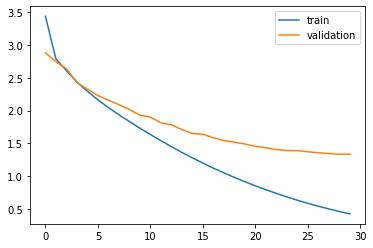

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [ ]:
from keras.models import load_model
model = load_model(filename)
preds = model.predict_classes(testX) #give the class with highest probability


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [ ]:
eng_dict = {t:w for w,t in eng_tokenizer.word_index.items()}


In [ ]:
eng_preds = []
for p in preds:
  sent = []
  for t in p:
    w = eng_dict.get(t) if t > 0 else ""
    sent.append(w)
  eng_preds.append(' '.join(sent))

In [ ]:
pred_df = pd.DataFrame({'actual':test[:,0], 'predicted':eng_preds})
pred_df.head(15)

,actual,predicted
0,it cannot last long,it cannot be long
1,am i right,i quite right
2,guess who i am,what who i
3,were in town,were in the
4,tom runs the fastest,tom is making
5,i will vouch for him,ill get him him him
6,can i spend the night,can i order in
7,please write it down,please to for
8,the water is hot,the water is hot
9,they always complain,youre always always


In [ ]:
pred_df.sample(15)

,actual,predicted
4429,did tom contact you,did tom contact mary
2150,look at the next page,look on next
8094,nuclear power is safe,thats is ready
5042,the baby is sleeping,the baby is
3448,was tom right,was tom right right
5174,im a little busy,im a little
2939,baking is fun,do you fun tennis
2503,you can stay with us,you can stay with us
9338,were in a hurry,were in in hurry
9638,we got married,we traveled together
